In [21]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sns


df= pd.read_csv('Bank_churn.csv')
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
def uniq():
    for coloumn in df:
        print(f'{coloumn}:{df[coloumn].unique()}')

In [23]:
df.shape

(10000, 14)

In [24]:
uniq()

RowNumber:[    1     2     3 ...  9998  9999 10000]
CustomerId:[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 7

In [25]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [26]:
df.drop(['RowNumber','CustomerId','Surname',],axis='columns',inplace=True)

In [27]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
for i in df:
    if df[i].dtypes=='object':
        print(f'{i}:{df[i].unique()}')

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [29]:
df.replace({'Male':1,'Female':0},inplace=True)

In [30]:
for i in df:
    if df[i].dtypes=='object':
        print(f'{i}:{df[i].unique()}')

Geography:['France' 'Spain' 'Germany']


In [31]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
df.shape

(10000, 11)

In [33]:
len(df.notnull())

10000

In [34]:
df2=pd.get_dummies(data=df,columns=['Geography'])

In [35]:
df2.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scale_values=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

df2[scale_values]=scaler.fit_transform(df2[scale_values])


In [37]:

df2.dtypes


CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [38]:
df2.shape

(10000, 13)

In [39]:
x=df2.drop(['Exited'],axis='columns')
y=df2.Exited


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x.shape

(10000, 12)

In [40]:
model= keras.Sequential([
    keras.layers.Dense(7,input_shape=(11,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=["accuracy"]
    
)

model.fit(X_train,y_train,epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\balij\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\balij\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\balij\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\balij\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\balij\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\balij\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 11), found shape=(None, 12)


In [ ]:
model.evaluate(X_test,y_test)

104/104 [==============================] - 1s 4ms/step - loss: 0.3326 - accuracy: 0.8703


[0.3325546979904175, 0.8703030347824097]

In [ ]:
y_pred=model.predict(X_test)
y_pred[20:40]

array([[0.11289042],
       [0.0077123 ],
       [0.1044786 ],
       [0.10927838],
       [0.04178464],
       [0.22753811],
       [0.06942233],
       [0.0199081 ],
       [0.01823545],
       [0.1675244 ],
       [0.0506973 ],
       [0.04764766],
       [0.14104035],
       [0.02849409],
       [0.06686583],
       [0.69920707],
       [0.3334459 ],
       [0.03403503],
       [0.13134837],
       [0.02397653]], dtype=float32)

In [ ]:
y_predicted=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

y_predicted[20:40]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2657
           1       0.83      0.42      0.56       643

    accuracy                           0.87      3300
   macro avg       0.85      0.70      0.74      3300
weighted avg       0.87      0.87      0.85      3300



<Figure size 640x480 with 0 Axes>

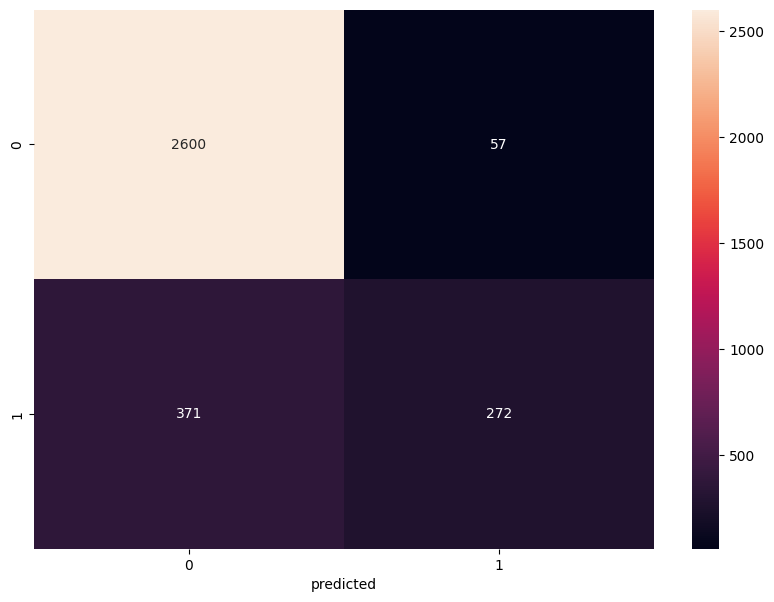

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.figure('Truth')
